In [1]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Define transforms for preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to fit the input size of ResNet
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load the dataset
dataset = torchvision.datasets.ImageFolder(root="Smart attendance dataset", transform=transform)
print("dataset loaded")
# Get class names
class_names = dataset.classes

# Count how many images are fetched for each class
class_counts = {class_name: 0 for class_name in class_names}
for _, label in dataset:
    class_counts[class_names[label]] += 1
    print("Class Counts: ", class_counts[class_names[label]])

    
# Split dataset into train and test sets
train_size = int(0.9 * len(dataset))
test_size = len(dataset) - train_size
train_set, test_set = torch.utils.data.random_split(dataset, [train_size, test_size])
print("Size of training set: ", len(train_set))
print("Size of testing set: ", len(test_set))

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)

# Define the ResNet model
resnet = models.resnet18(pretrained=True)
num_features = resnet.fc.in_features
resnet.fc = nn.Linear(num_features, len(class_names))

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet.parameters(), lr=0.001, momentum=0.9)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

# Test the model
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = resnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

# Save the model
torch.save(resnet.state_dict(), 'resnet_model.pth')

dataset loaded
Class Counts:  1
Class Counts:  2
Class Counts:  3
Class Counts:  4
Class Counts:  5
Class Counts:  6
Class Counts:  7
Class Counts:  8
Class Counts:  9
Class Counts:  10
Class Counts:  11
Class Counts:  12
Class Counts:  13
Class Counts:  14
Class Counts:  15
Class Counts:  16
Class Counts:  17
Class Counts:  18
Class Counts:  19
Class Counts:  20
Class Counts:  21
Class Counts:  22
Class Counts:  23
Class Counts:  24
Class Counts:  25
Class Counts:  26
Class Counts:  27
Class Counts:  28
Class Counts:  29
Class Counts:  30
Class Counts:  31
Class Counts:  32
Class Counts:  33
Class Counts:  34
Class Counts:  35
Class Counts:  36
Class Counts:  37
Class Counts:  38
Class Counts:  39
Class Counts:  40
Class Counts:  41
Class Counts:  42
Class Counts:  43
Class Counts:  44
Class Counts:  45
Class Counts:  46
Class Counts:  47
Class Counts:  48
Class Counts:  49
Class Counts:  50
Class Counts:  51
Class Counts:  52
Class Counts:  53
Class Counts:  54
Class Counts:  55
Clas

Class Counts:  76
Class Counts:  77
Class Counts:  78
Class Counts:  79
Class Counts:  80
Class Counts:  81
Class Counts:  82
Class Counts:  83
Class Counts:  84
Class Counts:  85
Class Counts:  86
Class Counts:  87
Class Counts:  88
Class Counts:  89
Class Counts:  90
Class Counts:  91
Class Counts:  92
Class Counts:  93
Class Counts:  94
Class Counts:  95
Class Counts:  96
Class Counts:  97
Class Counts:  98
Class Counts:  99
Class Counts:  100
Class Counts:  1
Class Counts:  2
Class Counts:  3
Class Counts:  4
Class Counts:  5
Class Counts:  6
Class Counts:  7
Class Counts:  8
Class Counts:  9
Class Counts:  10
Class Counts:  11
Class Counts:  12
Class Counts:  13
Class Counts:  14
Class Counts:  15
Class Counts:  16
Class Counts:  17
Class Counts:  18
Class Counts:  19
Class Counts:  20
Class Counts:  21
Class Counts:  22
Class Counts:  23
Class Counts:  24
Class Counts:  25
Class Counts:  26
Class Counts:  27
Class Counts:  28
Class Counts:  29
Class Counts:  30
Class Counts:  31


Class Counts:  66
Class Counts:  67
Class Counts:  68
Class Counts:  69
Class Counts:  70
Class Counts:  71
Class Counts:  72
Class Counts:  73
Class Counts:  74
Class Counts:  75
Class Counts:  76
Class Counts:  77
Class Counts:  78
Class Counts:  79
Class Counts:  80
Class Counts:  81
Class Counts:  82
Class Counts:  83
Class Counts:  84
Class Counts:  85
Class Counts:  86
Class Counts:  87
Class Counts:  88
Class Counts:  89
Class Counts:  90
Class Counts:  91
Class Counts:  92
Class Counts:  93
Class Counts:  94
Class Counts:  95
Class Counts:  96
Class Counts:  97
Class Counts:  98
Class Counts:  99
Class Counts:  100
Size of training set:  895
Size of testing set:  100


C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Finished Training
Accuracy of the network on the test images: 100 %


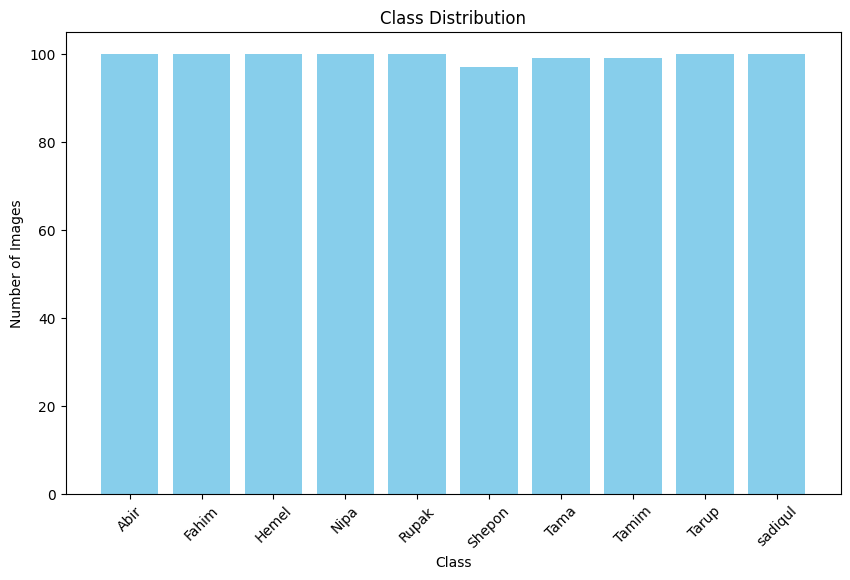

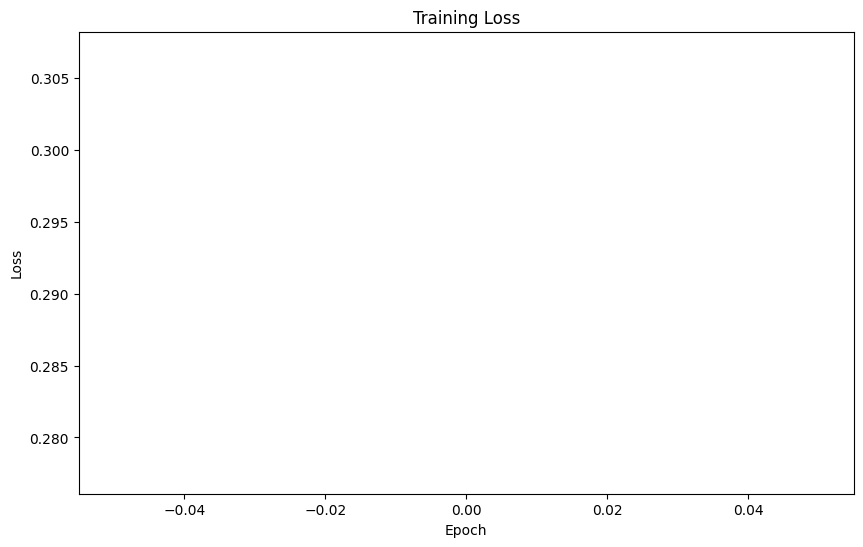

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Normalized confusion matrix


IndexError: index 4 is out of bounds for dimension 0 with size 4

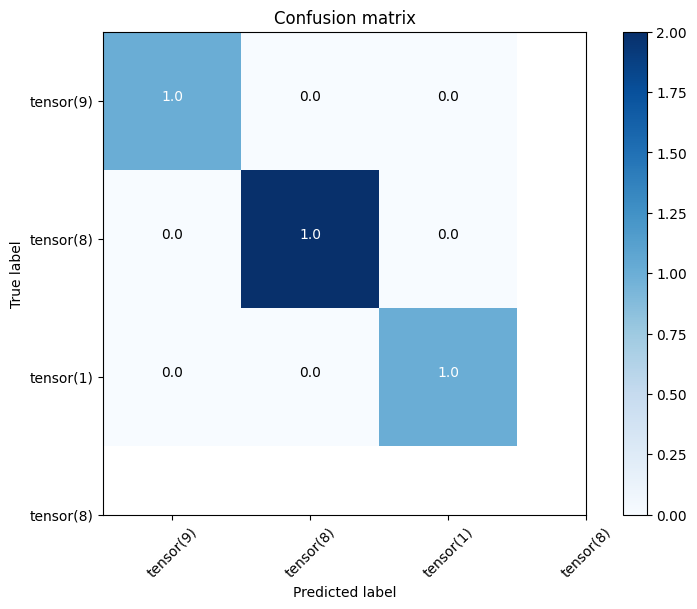

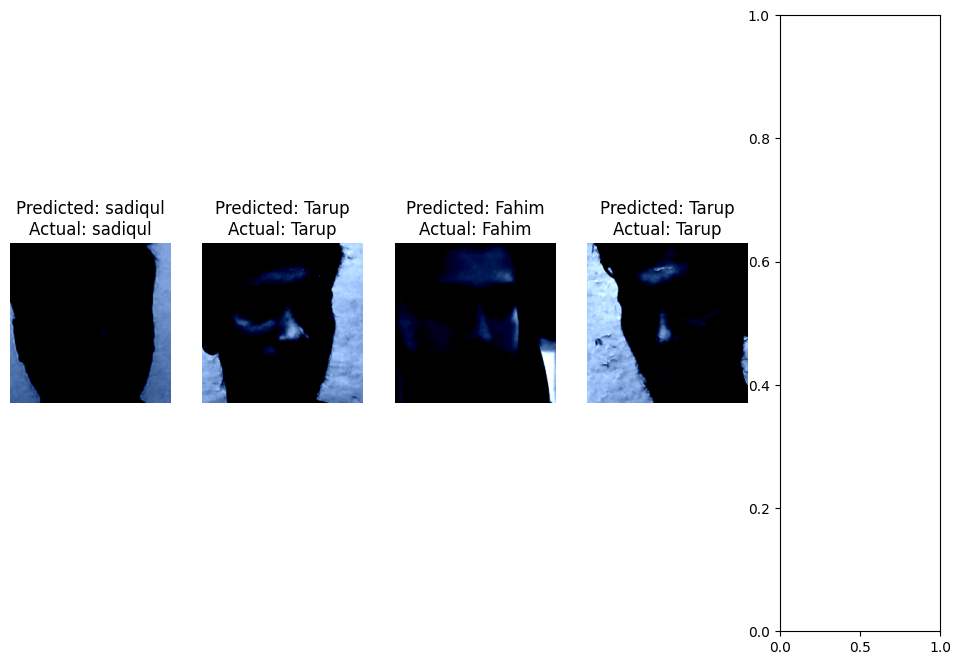

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot class distribution
def plot_class_distribution(class_counts):
    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution')
    plt.xticks(rotation=45)
    plt.show()

# Plot training loss
def plot_training_loss(losses):
    plt.figure(figsize=(10, 6))
    plt.plot(losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

# Plot accuracy
def plot_accuracy(accuracies):
    plt.figure(figsize=(10, 6))
    plt.plot(accuracies)
    plt.title('Accuracy on Test Set')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

# Plot sample predictions with images
def plot_sample_predictions(images, labels, predictions, class_names, num_samples=5):
    plt.figure(figsize=(12, 8))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].permute(1, 2, 0))  # Convert from tensor to image format (C, H, W) -> (H, W, C)
        plt.title(f'Predicted: {class_names[predictions[i]]}\nActual: {class_names[labels[i]]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize class distribution
plot_class_distribution(class_counts)

# Visualize training loss
plot_training_loss(running_loss)

# Visualize accuracy
# plot_accuracy(test_accuracies)

# Visualize confusion matrix
cm = confusion_matrix(labels, predicted)
plot_confusion_matrix(cm, labels, normalize=True)

# Visualize sample predictions
plot_sample_predictions(images, labels, predicted, class_names)

# Project Code: AI mode

In [ ]:
import os
import datetime
import subprocess
import pandas as pd
import tkinter as tk
import cv2
from PIL import Image, ImageTk
import torch
import Utils
import torchvision.transforms as transforms
from torchvision.models import resnet18

class App:
    def __init__(self):
        self.main_window = tk.Tk()
        self.main_window.geometry("1200x520+350+100")

        self.login_button_main_window = Utils.get_button(self.main_window, 'login', 'green', self.login)
        self.login_button_main_window.place(x=30, y=300)

        self.register_new_user_button_main_window = Utils.get_button(self.main_window, 'Register New Student', 'gray',
                                                                          self.register_new_user, fg='black')
        self.register_new_user_button_main_window.place(x=30, y=400)

        self.webcam_label = Utils.get_img_label(self.main_window)
        self.webcam_label.place(x=450, y=0, width=700, height = 500)

        self.add_webcam(self.webcam_label)

        self.db_dir = './Student Images'
        if not os.path.exists(self.db_dir):
            os.mkdir(self.db_dir)

        self.attendance_file = 'Attendance.xlsx'
        self.student_info_file = 'Student Information.xlsx'

        # Load the pre-trained ResNet model
        self.model = resnet18(pretrained=False)
        self.model.fc = torch.nn.Linear(self.model.fc.in_features, 10)  # Adjust final fully connected layer
        self.model.load_state_dict(torch.load('resnet_model.pth', map_location=torch.device('cpu')))
        self.model.eval()  # Set the model to evaluation mode

        # Define the transformation for input images
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

    def add_webcam(self, label):
        if 'cap' not in self.__dict__:
            self.cap = cv2.VideoCapture(0)

        self._label = label
        self.process_webcam()

    def process_webcam(self):
        ret, frame = self.cap.read()
        self.most_recent_capture_arr = frame

        img_ = cv2.cvtColor(self.most_recent_capture_arr, cv2.COLOR_BGR2RGB)
        self.most_recent_capture_pil = Image.fromarray(img_)

        imgtk = ImageTk.PhotoImage(image= self.most_recent_capture_pil)
        self._label.imgtk = imgtk
        self._label.configure(image=imgtk)

        self._label.after(20, self.process_webcam)

    def login(self):
        unknown_img_path = './.tmp.jpg'
        cv2.imwrite(unknown_img_path, self.most_recent_capture_arr)
        name = self.recognize_face(unknown_img_path)

        if name == 'unknown_person':
            Utils.msg_box('Oops...', 'Unknown User \nPlease Register as a New User or try again.')
        else:
            self.record_attendance(name)
            Utils.msg_box('Welcome!', 'Welcome, {}'.format(name))

        os.remove(unknown_img_path)

    def recognize_face(self, image_path):
        # Preprocess the clicked image
        img = Image.open(image_path)
        img = self.transform(img)
        img = img.unsqueeze(0)  # Add batch dimension

        # Pass the image through the model to get predictions
        with torch.no_grad():
            outputs = self.model(img)
            _, predicted = torch.max(outputs, 1)
            class_index = predicted.item()

        # Map the predicted class index to class name
        class_name = self.get_class_name(class_index)
        return class_name

    def get_class_name(self, class_index):
        # Define your mapping from class index to class name
        class_names = ['Abir', 'Fahim', 'Hemel', 'Nipa', 'Rupak', 'Sadiqul', 'Shepon', 'Tama', 'Tamim', 'Tarup']

        # Return the class name corresponding to the class index
        if 0 <= class_index < len(class_names):
            return class_names[class_index]
        else:
            return 'unknown_person'

    def record_attendance(self, name):
        now = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        attendance_data = pd.DataFrame({'Date Time': [now], 'Name': [name]})
        try:
            student_info = pd.read_excel(self.student_info_file)
            student_info = student_info.loc[student_info['Name'] == name]
            if not student_info.empty:
                student_id = student_info.iloc[0]['Student ID']
                attendance_data['Student ID'] = student_id
                if os.path.exists(self.attendance_file):
                    existing_data = pd.read_excel(self.attendance_file)
                    attendance_data = pd.concat([existing_data, attendance_data], ignore_index=True)
                attendance_data.to_excel(self.attendance_file, index=False)
            else:
                raise ValueError("Student information not found for {}".format(name))
        except Exception as e:
            print("Error saving attendance:", e)

    def register_new_user(self):
        self.register_new_user_window = tk.Toplevel(self.main_window)
        self.register_new_user_window.geometry("1200x520+370+120")

        self.accept_button_register_new_user_window = Utils.get_button(self.register_new_user_window, 'Accept', 'green', self.accept_register_new_user)
        self.accept_button_register_new_user_window.place(x=30, y=300)

        self.try_again_button_register_new_user_window = Utils.get_button(self.register_new_user_window, 'Try Again', 'red',self.accept_register_new_user)
        self.try_again_button_register_new_user_window.place(x=30, y=400)

        self.capture_label = Utils.get_img_label(self.register_new_user_window)
        self.capture_label.place(x=450, y=0, width=700, height=500)

        self.add_img_to_label(self.capture_label)

        self.entry_text_register_new_user = Utils.get_entry_text(self.register_new_user_window)
        self.entry_text_register_new_user.place(x=30, y=150)

        self.text_label_register_new_user = Utils.get_text_label(self.register_new_user_window, 'Please, \nInput Username:')
        self.text_label_register_new_user.place(x=30, y=70)

    def add_img_to_label(self, label):
        imgtk = ImageTk.PhotoImage(image=self.most_recent_capture_pil)
        label.imgtk = imgtk
        label.configure(image=imgtk)

        self.register_new_user_capture = self.most_recent_capture_arr.copy()

    def accept_register_new_user(self):
        name = self.entry_text_register_new_user.get(1.0, "end-1c")

        cv2.imwrite(os.path.join(self.db_dir, '{}.jpg'.format(name)), self.register_new_user_capture)

        Utils.msg_box('Success!','User was Registered Successfully')

        self.register_new_user_window.destroy()

    def try_again_register_new_user(self):
        self.register_new_user_window.destroy()

    def start(self):
        self.main_window.mainloop()

if __name__ == "__main__":
    app = App()
    app.start()

# Utils.py File

In [ ]:
import tkinter as tk
from tkinter import messagebox

def get_button(window, text, color, command, fg='white'):
    button = tk.Button(
        window,
        text=text,
        activebackground = 'black',
        activeforeground= 'white',
        fg=fg,
        bg=color,
        command=command,
        height=2,
        width=20,
        font=('Helvetica bold', 20)
    )
    return button

def get_img_label(window):
    label = tk.Label(window)
    label.grid(row=0, column=0)
    return label

def get_text_label(window, text):
    label = tk.Label(window, text=text)
    label.config(font=("sans-serif", 21), justify = "left")
    return label

def get_entry_text(window):
    inputtxt= tk.Text(window,
                      height=2,
                      width=15, font=("Arial", 32))
    return inputtxt
def msg_box(title, description):
    messagebox.showinfo(title, description)
